## 安裝pytrends
- pip install pytrends

In [3]:
from pytrends.pyGTrends import pyGTrends
import time
from random import randint

google_username = ""
google_password = ""
path = ""

# connect to Google
connector = pyGTrends(google_username, google_password)

# make request
connector.request_report("感冒")

# wait a random amount of time between requests to avoid bot detection
time.sleep(randint(5, 10))

# download file
connector.save_csv(path, "flu2")

Now downloading information for:
http://www.google.com/trends/trendsReport?q=%E6%84%9F%E5%86%92&hl=en-US&cmpt=q&content=1&export=1


In [1]:
import pandas as pd
flu = pd.read_csv('data/flu.csv', index_col='Date', parse_dates=True)
flu.head()

,cold,flu
Date,,
2004-01-04,32,1
2004-01-11,26,1
2004-01-18,17,1
2004-01-25,26,2
2004-02-01,33,3


## 取得康那香股價

In [3]:
from datetime import  timedelta
import datetime
import pandas as pd
import pandas.io.data
tw9919 = pd.io.data.get_data_yahoo('9919.TW', 
                                 start=datetime.datetime(2004, 1, 1), 
                                 end=datetime.datetime(2016, 8, 6))
tw9919.index = tw9919.index.map(lambda e: e-timedelta(days=1))

## 合併股價

In [6]:
results = tw9919.merge(flu, left_index=True, right_index=True, how='inner')
data = results[['Adj Close', 'cold', 'flu']]

In [8]:
data.columns = ['tw9919', 'cold', 'flu']
data.head()

,tw9919,cold,flu
Date,,,
2004-01-04,10.43874,32,1
2004-01-11,10.37141,26,1
2004-01-18,10.37141,17,1
2004-01-25,10.37141,26,2
2004-02-01,10.91024,33,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 648 entries, 2004-01-04 to 2016-07-31
Data columns (total 3 columns):
tw9919    648 non-null float64
cold      648 non-null int64
flu       648 non-null int64
dtypes: float64(1), int64(2)
memory usage: 20.2 KB


## 繪製圖表

Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D1DBBA8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3BB278>], dtype=object)

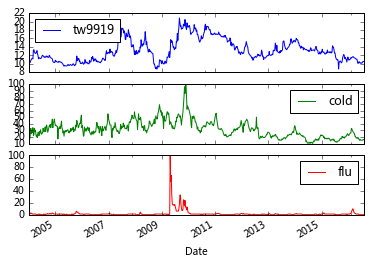

In [11]:
%pylab inline 
data.plot(subplots=True)

In [12]:
data['cold_mavg'] = pd.rolling_mean(data.cold, 3)
data.head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,tw9919,cold,flu,cold_mavg
Date,,,,
2004-01-04,10.43874,32,1,NaN
2004-01-11,10.37141,26,1,NaN
2004-01-18,10.37141,17,1,25.000000
2004-01-25,10.37141,26,2,23.000000
2004-02-01,10.91024,33,3,25.333333


In [13]:
data['cold_mavg'] = data.cold_mavg.shift(1)
data.head(10)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,tw9919,cold,flu,cold_mavg
Date,,,,
2004-01-04,10.43874,32,1,NaN
2004-01-11,10.37141,26,1,NaN
2004-01-18,10.37141,17,1,NaN
2004-01-25,10.37141,26,2,25.000000
2004-02-01,10.91024,33,3,23.000000
2004-02-08,10.97756,25,2,25.333333
2004-02-15,11.24694,29,2,28.000000
2004-02-22,11.31426,27,1,29.000000
2004-02-29,11.17961,34,1,27.000000


In [14]:
data['order'] = 0
# 黃金交叉做多
data['order'][data.cold > data.cold_mavg] = -1 
# 死亡交叉做空
data['order'][data.cold < data.cold_mavg] = 1
data.head(10)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\pandas\core\generic.py:4059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda2\lib\site-packages\IPython\

,tw9919,cold,flu,cold_mavg,order
Date,,,,,
2004-01-04,10.43874,32,1,NaN,0
2004-01-11,10.37141,26,1,NaN,0
2004-01-18,10.37141,17,1,NaN,0
2004-01-25,10.37141,26,2,25.000000,-1
2004-02-01,10.91024,33,3,23.000000,-1
2004-02-08,10.97756,25,2,25.333333,1
2004-02-15,11.24694,29,2,28.000000,-1
2004-02-22,11.31426,27,1,29.000000,1
2004-02-29,11.17961,34,1,27.000000,-1


## 計算9919報酬

In [15]:
data['ret_tw9919'] = data.tw9919.pct_change()
data.head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,tw9919,cold,flu,cold_mavg,order,ret_tw9919
Date,,,,,,
2004-01-04,10.43874,32,1,NaN,0,NaN
2004-01-11,10.37141,26,1,NaN,0,-0.006450
2004-01-18,10.37141,17,1,NaN,0,0.000000
2004-01-25,10.37141,26,2,25,-1,0.000000
2004-02-01,10.91024,33,3,23,-1,0.051953


In [16]:
data['ret_tw9919'] = data['ret_tw9919'].shift(-1)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
data['ret_google'] = data.order * data.ret_tw9919
data.head(10)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,tw9919,cold,flu,cold_mavg,order,ret_tw9919,ret_google
Date,,,,,,,
2004-01-04,10.43874,32,1,NaN,0,-0.006450,-0.000000
2004-01-11,10.37141,26,1,NaN,0,0.000000,0.000000
2004-01-18,10.37141,17,1,NaN,0,0.000000,0.000000
2004-01-25,10.37141,26,2,25.000000,-1,0.051953,-0.051953
2004-02-01,10.91024,33,3,23.000000,-1,0.006170,-0.006170
2004-02-08,10.97756,25,2,25.333333,1,0.024539,0.024539
2004-02-15,11.24694,29,2,28.000000,-1,0.005986,-0.005986
2004-02-22,11.31426,27,1,29.000000,1,-0.011901,-0.011901
2004-02-29,11.17961,34,1,27.000000,-1,0.186746,-0.186746


## 觀察資金變化

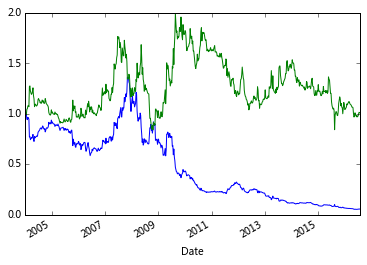

In [20]:
(1 + data.ret_google).cumprod().plot();
(1 + data.ret_tw9919).cumprod().plot();